# Capsule Network for Graphical Perception of Treemaps

### 0. Requirements

*Python and extensions*
- **Python**: 3.7
- **Tensorflow**: 1.15.0
- **Numpy**: 1.18.3
- **docopt**: 0.6.2
- **sklearn**: 0.22.2
- **Matplotlib**: 3.2.1

*GPU libraries*
- **Nvidia cuDNN**: 7.4
- **Nvidia CUDA**: 10.0

## 1. Model architecture and modifications

Original tensorflow implementation of Capsule Network by thibo37800 at https://github.com/thibo73800/capsnet-traffic-sign-classifier <br>

The tensorboard for the model:

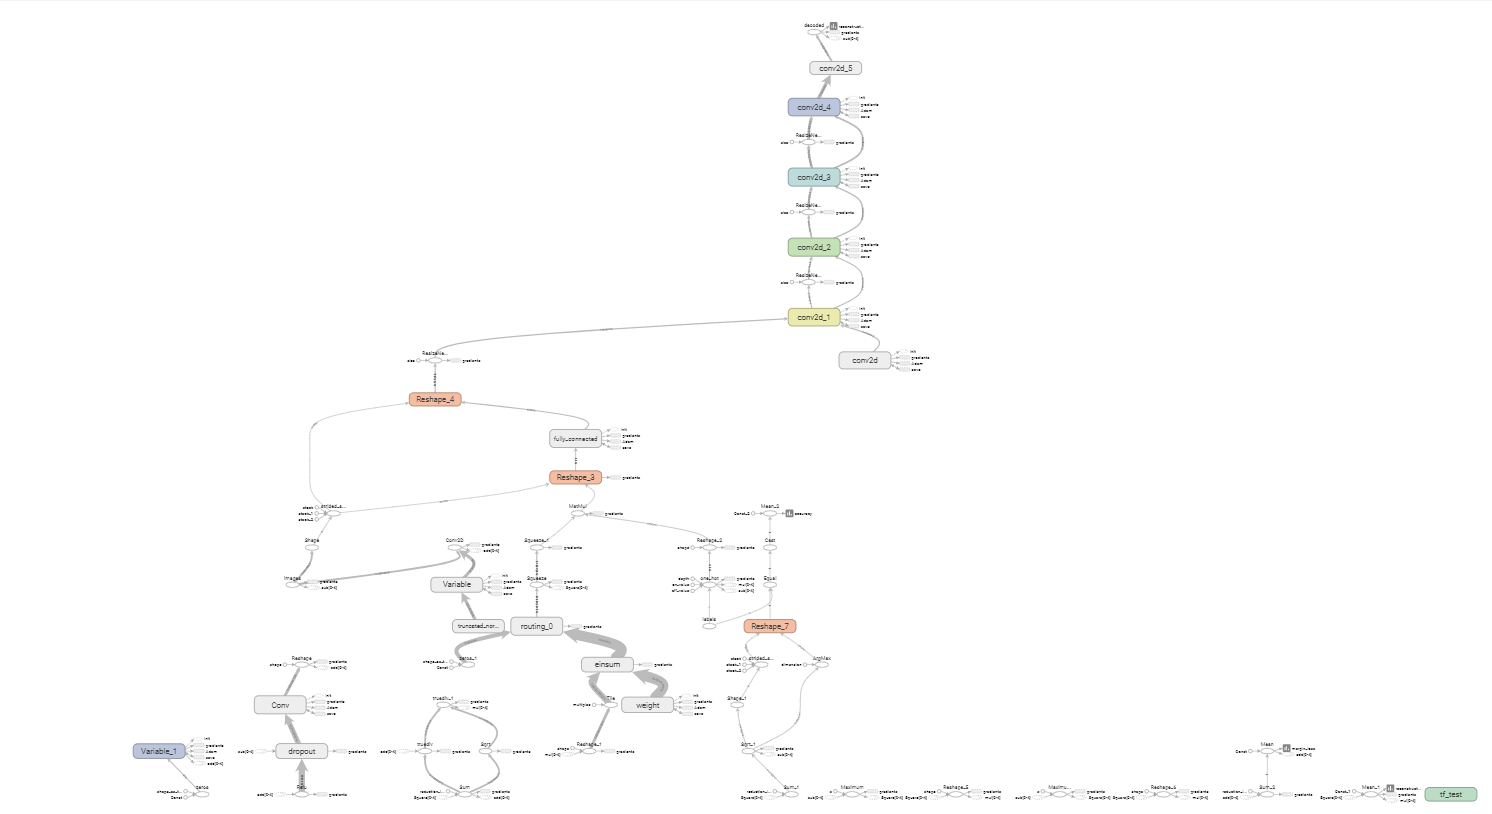

The data for training, validation and testing is read using the data_handler class. This extracts the image data to be used by the train, test and run_experiments classes. These classes then invoke the model, which is based on the model, model_base and caps_net classes. Model handles the parsing of the data by the network using the methods in model_base. The caps_net class provides specific computation methods such as the squashing function as outlined in the CapsNet paper.

*The following modifications were made to the implementation for this project:* <br><br>
data_handler.py was modified to read image data directly from folders instead of compressed pickle files. This is because the image data was available directly, so compressing and extracting the data would be a waste of memory. The data_handler class reads the image path passed to it, and extracts the images in the given folder. It then converts the image data with two key/value pairs: 'features' which is a 4D array containing the image pixel data, and 'labels' which is a 1D array containing all label values corresponding to the images. <br><br>
model.py was modified to use the correct amount of label values (15) for the treemap classification. An extra upsampling layer was added in the decoder method to increase the reconstructed image resolution to 48x48, which is the input resolution.<br><br>
*The following classes were added to the implementation*:<br><br>
run_experiments.py was created to allow running the main experiment and the sub-experiments. It is detailed in section 3.2 below.

## 2. Directory guide

The following directories are present in the repository: <br>
| Project root <br>
*All python classes for training and testing the network are stored in root folder* <br>
|-- dataset <br>
|---- experiments<br>
*empty folders, standard path to dataset. Experiment-data contains one individual folder for each experiment, which contain one folder for each variable value* <br>
|-- outputs <br>
|---- checkpoints <br>
*Standard path used to store training checkpoints for the model* <br>
|---- tensorboard <br>
*Standard path to store tensorboard files for the model* <br>
|-- settings <br>
*Folder containing the hypterparameters in json format* <br>
|--testresults <br>
*Standard path to store test results in csv files, one for each experiment directory.* <br>

## 3. Running experiments

### 3.1 Dataset

The dataset can be downloaded from the following link: <br>
https://www.filehosting.org/file/details/870093/treemap-dataset.zip
The zip file contains the following folders: <br>

| training-data <br>
| validation-data <br>
| test-data <br>
| test-images <br>
| experiments <br>
|-- baseline <br>
|-- colors <br>
|-- dotsize <br>
|-- maxchildren <br>
|-- maxnodes <br>
|-- maxnodesize <br>
|-- resolution <br>

*All data folders contain both small resolution (96x96) and large resolution (300x300) PNG images. The small images were used for training and testing. The subfolders in the experiment root folder contain the data for the sub-experiments*

### 3.2 Training and testing

The network can be trained on the dataset using<br>
~python train.py dataset/ outputs/
Where dataset/ is the path to the training and validation dataset folders, and outputs (by default) is the path to the folder where the training checkpoints and the tensorboard will be stored.

The run_experiments.py class was added to provide the functionality to run all experiments in order, and output the results in the same format to the designated folder. The folder 'testresults' will be created and the results of the experiments are stored in csv format. The titles of the respective experiment folders are the variable descriptors.

The run_experiments.py class can be run using<br>
~python run_experiments.py dataset/ ckpt/<br>
Where dataset/ is the path to the dataset folder (containing the individual experiment folders) and ckpt/ is the path to the training checkpoint file to load the trained model.

Five images can be tested and shown reconstructed (along with the softmax probabilities for label values) using the test_images.py class: <br>
~python test_images ckpt dataset/ <br>
Where ckpt is the path to the checkpoint file of the trained model, and dataset/ the path to the folder containing the five images.

## 4. License

Copyright 2020 Willem Hulst

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.